__SHIFTING ARRAY__

In [5]:
import numpy as np

state = np.array([
[1, 2, 3, 4],
[5, 6, 7, 8],
[9, 10, 11, 12],
[13, 14, 15, 16]])
print('Initial state:')
print(state)

for dx in range(-1, 2):
    print('SHIFT BY', dx)
    print(np.roll(state, shift=dx, axis=1))

Initial state:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
SHIFT BY -1
[[ 2  3  4  1]
 [ 6  7  8  5]
 [10 11 12  9]
 [14 15 16 13]]
SHIFT BY 0
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
SHIFT BY 1
[[ 4  1  2  3]
 [ 8  5  6  7]
 [12  9 10 11]
 [16 13 14 15]]


__SIMULATING AN ELEMENTARY CELLULAR AUTOMATON__

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
u = np.array([[4], [2], [1]])

In [8]:
def step(x, rule_b):
    """Compute a single stet of an elementary cellular
    automaton."""
    # The columns contains the L, C, R values
    # of all cells.
    y = np.vstack((np.roll(x, 1), x,
                   np.roll(x, -1))).astype(np.int8)
    # We get the LCR pattern numbers between 0 and 7.
    z = np.sum(y * u, axis=0).astype(np.int8)
    # We get the patterns given by the rule.
    return rule_b[7 - z]

In [9]:
def generate(rule, size=100, steps=100):
    """Simulate an elementary cellular automaton given
    its rule (number between 0 and 255)."""
    # Compute the binary representation of the rule.
    rule_b = np.array(
        [int(_) for _ in np.binary_repr(rule, 8)],
        dtype=np.int8)
    x = np.zeros((steps, size), dtype=np.int8)
    # Random initial state.
    x[0, :] = np.random.rand(size) < .5
    # Apply the step function iteratively.
    for i in range(steps - 1):
        x[i + 1, :] = step(x[i, :], rule_b)
    return x

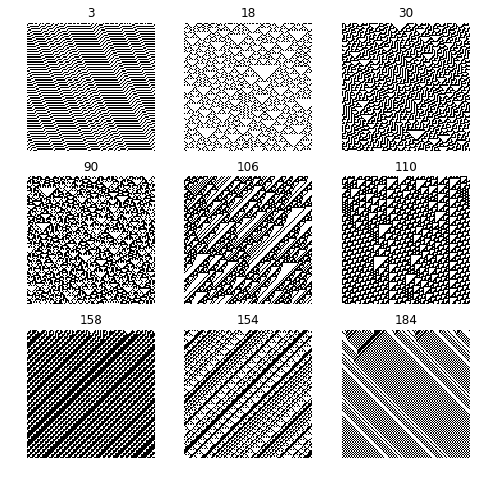

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
rules = [3, 18, 30,
         90, 106, 110,
         158, 154, 184]
for ax, rule in zip(axes.flat, rules):
    x = generate(rule)
    ax.imshow(x, interpolation='none',
              cmap=plt.cm.binary)
    ax.set_axis_off()
    ax.set_title(str(rule))

__11.3 SIMULATING CELLULAR AUTOMATA__

In [35]:
## DROPLET RULE

# Initialization
n = 100 # size of space: n x n
p = 0.1 # probability of initially panicky individuals
def initialize():
    global config, nextconfig
    config = zeros([n, n])
    for x in xrange(n):
        for y in xrange(n):
            config[x, y] = 1 if random() < p else 0
            nextconfig = zeros([n, n])
            
# Observation
def observe():
    global config, nextconfig
    cla()
    imshow(config, vmin = 0, vmax = 1, cmap = cm.binary)
def update():
    global config, nextconfig
    for x in xrange(n):
        for y in xrange(n):
            count = 0
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    count += config[(x + dx) % n, (y + dy) % n]
            nextconfig[x, y] = 1 if count >= 4 else 0
    config, nextconfig = nextconfig, config

import pycxsimulator
pycxsimulator.GUI().start(func=[initialize, observe, update])

In [36]:
## DROPLET RULE

# Initialization
n = 100 # size of space: n x n
p = 0.1 # probability of initially panicky individuals
def initialize():
    global config, nextconfig
    config = zeros([n, n])
    for x in xrange(n):
        for y in xrange(n):
            config[x, y] = 1 if random() < p else 0
            nextconfig = zeros([n, n])
            
# Observation
def observe():
    global config, nextconfig
    cla()
    imshow(config, vmin = 0, vmax = 1, cmap = cm.binary)
def update():
    global config, nextconfig
    for x in xrange(n):
        for y in xrange(n):
            count = 0
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    count += config[(x + dx) % n, (y + dy) % n]
            nextconfig[x, y] = 1 if count >= 4 else 0
    config, nextconfig = nextconfig, config

import pycxsimulator
pycxsimulator.GUI().start(func=[initialize, observe, update])

In [44]:
## GAME OF LIFE 

# Initialization
n = 100 # size of space: n x n
p = 0.1 # probability of initially living cells
def initialize():
    global config, nextconfig
    config = zeros([n, n])
    for x in xrange(n):
        for y in xrange(n):
            config[x, y] = 1 if random() < p else 0
            nextconfig = zeros([n, n])
    density = []
            
# Observation
def observe():
    global config, nextconfig
    cla()
    imshow(config, vmin = 0, vmax = 1, cmap = cm.binary)
def update():
    global config, nextconfig
    for x in xrange(n):
        for y in xrange(n):
            count = 0
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    count += config[(x + dx) % n, (y + dy) % n]
            nextconfig[x, y] = 1 if count == 3 else 0
            if nextconfig[x, y] == 1:
                density += 1 
    config, nextconfig = nextconfig, config

import pycxsimulator
pycxsimulator.GUI().start(func=[initialize, observe, update])

In [ ]:
## "pycxsimulator.py"
## Realtime Simulation GUI for PyCX
##
## Developed by:
## Chun Wong
## email@chunwong.net
##
## Revised by:
## Hiroki Sayama
## sayama@binghamton.edu
##
## Copyright 2012 Chun Wong & Hiroki Sayama
##
## Simulation control & GUI extensions
## Copyright 2013 Przemyslaw Szufel & Bogumil Kaminski
## {pszufe, bkamins}@sgh.waw.pl
##
## Fixing errors due to "the grid and pack problem" by:
## Toshihiro Tanizawa
## tanizawa@ee.kochi-ct.ac.jp
## began at 2016-06-15(Wed) 17:10:17
## fixed grid() and pack() problem on 2016-06-21(Tue) 18:29:40
##
## The following two lines should be placed at the beginning of your simulator code:
##
## import matplotlib
## matplotlib.use('TkAgg')

import pylab as PL
from tkinter import ttk
from tkinter import *
from tkinter.ttk import Notebook


class GUI:

    ## GUI variables
    titleText = 'PyCX Simulator'  # window title
    timeInterval = 0              # refresh time in milliseconds
    running = False
    modelFigure = None
    stepSize = 1
    currentStep = 0
    
    # Constructor
    def __init__(self, title='PyCX Simulator', interval=0, stepSize=1, parameterSetters=[]):
        self.titleText = title
        self.timeInterval = interval
        self.stepSize = stepSize
        self.parameterSetters = parameterSetters
        self.varEntries = {}
        self.statusStr = ""
               
        self.initGUI()
        
        
    # Initialization
    def initGUI(self):
        
        #create root window
        self.rootWindow = Tk()
        self.statusText = StringVar(value=self.statusStr) # at this point, statusStr = ""
        self.setStatusStr("Simulation not yet started")

        self.rootWindow.wm_title(self.titleText) # titleText = 'PyCX Simulator'
        self.rootWindow.protocol('WM_DELETE_WINDOW', self.quitGUI)
        self.rootWindow.geometry('450x300')
        self.rootWindow.columnconfigure(0, weight=1)
        self.rootWindow.rowconfigure(0, weight=1)
        
        self.notebook = Notebook(self.rootWindow)      
        # self.notebook.grid(row=0,column=0,padx=2,pady=2,sticky='nswe') # commented out by toshi on 2016-06-21(Tue) 18:30:25
        self.notebook.pack(side=TOP, padx=2, pady=2)
        
        self.frameRun = Frame()
        self.frameSettings = Frame()
        self.frameParameters = Frame()
        self.frameInformation = Frame()          
        
        self.notebook.add(self.frameRun,text="Run")
        self.notebook.add(self.frameSettings,text="Settings")
        self.notebook.add(self.frameParameters,text="Parameters")
        self.notebook.add(self.frameInformation,text="Info")
        self.notebook.pack(expand=NO, fill=BOTH, padx=5, pady=5 ,side=TOP)
        # self.notebook.grid(row=0, column=0, padx=5, pady=5, sticky='nswe')   # commented out by toshi on 2016-06-21(Tue) 18:31:02
        
        self.status = Label(self.rootWindow, width=40,height=3, relief=SUNKEN, bd=1, textvariable=self.statusText)
        # self.status.grid(row=1,column=0,padx=5,pady=5,sticky='nswe') # commented out by toshi on 2016-06-21(Tue) 18:31:17
        self.status.pack(side=TOP, fill=X, padx=5, pady=5, expand=NO)

        # -----------------------------------
        # frameRun
        # -----------------------------------
        # buttonRun
        self.runPauseString = StringVar()
        self.runPauseString.set("Run")
        self.buttonRun = Button(self.frameRun,width=30,height=2,textvariable=self.runPauseString,command=self.runEvent)
        self.buttonRun.pack(side=TOP, padx=5, pady=5)
        self.showHelp(self.buttonRun,"Runs the simulation (or pauses the running simulation)")
        
        # buttonStep
        self.buttonStep = Button(self.frameRun,width=30,height=2,text='Step Once',command=self.stepOnce)
        self.buttonStep.pack(side=TOP, padx=5, pady=5)
        self.showHelp(self.buttonStep,"Steps the simulation only once")
        
        # buttonReset
        self.buttonReset = Button(self.frameRun,width=30,height=2,text='Reset',command=self.resetModel)
        self.buttonReset.pack(side=TOP, padx=5, pady=5) 
        self.showHelp(self.buttonReset,"Resets the simulation")

        # -----------------------------------
        # frameSettings
        # -----------------------------------
        can = Canvas(self.frameSettings)
        
        lab = Label(can, width=25,height=1,text="Step size ", justify=LEFT, anchor=W,takefocus=0)
        lab.pack(side='left')
        
        self.stepScale = Scale(can,from_=1, to=50, resolution=1,command=self.changeStepSize,orient=HORIZONTAL, width=25,length=150)
        self.stepScale.set(self.stepSize)
        self.showHelp(self.stepScale,"Skips model redraw during every [n] simulation steps\nResults in a faster model run.")
        self.stepScale.pack(side='left')
        
        can.pack(side='top')
    
        can = Canvas(self.frameSettings)
        lab = Label(can, width=25,height=1,text="Step visualization delay in ms ", justify=LEFT, anchor=W,takefocus=0)
        lab.pack(side='left')
        self.stepDelay = Scale(can,from_=0, to=max(2000,self.timeInterval),
                               resolution=10,command=self.changeStepDelay,orient=HORIZONTAL, width=25,length=150)
        self.stepDelay.set(self.timeInterval)
        self.showHelp(self.stepDelay,"The visualization of each step is delays by the given number of milliseconds.")
        self.stepDelay.pack(side='left')
        
        can.pack(side='top')
        
        # --------------------------------------------
        # frameInformation
        # --------------------------------------------
        scrollInfo = Scrollbar(self.frameInformation)
        self.textInformation = Text(self.frameInformation, width=45,height=13,bg='lightgray',wrap=WORD,font=("Courier",10))
        scrollInfo.pack(side=RIGHT, fill=Y)
        self.textInformation.pack(side=LEFT,fill=BOTH,expand=YES)
        scrollInfo.config(command=self.textInformation.yview)
        self.textInformation.config(yscrollcommand=scrollInfo.set)
        
        # --------------------------------------------
        # ParameterSetters
        # --------------------------------------------
        for variableSetter in self.parameterSetters:
            can = Canvas(self.frameParameters)
            
            lab = Label(can, width=25,height=1,text=variableSetter.__name__+" ",anchor=W,takefocus=0)
            lab.pack(side='left')
            
            ent = Entry(can, width=11)
            ent.insert(0, str(variableSetter()))
            
            if variableSetter.__doc__ != None and len(variableSetter.__doc__) > 0:
                self.showHelp(ent,variableSetter.__doc__.strip())
                
            ent.pack(side='left')
                
            can.pack(side='top')
            
            self.varEntries[variableSetter]=ent
            
        if len(self.parameterSetters) > 0:
            self.buttonSaveParameters = Button(self.frameParameters,width=50,height=1,
                                               command=self.saveParametersCmd,text="Save parameters to the running model",state=DISABLED)
            self.showHelp(self.buttonSaveParameters,
                          "Saves the parameter values.\nNot all values may take effect on a running model\nA model reset might be required.")
            self.buttonSaveParameters.pack(side='top',padx=5,pady=5)
            self.buttonSaveParametersAndReset = Button(self.frameParameters,width=50,height=1,
                                                       command=self.saveParametersAndResetCmd,text="Save parameters to the model and reset the model")
            self.showHelp(self.buttonSaveParametersAndReset,"Saves the given parameter values and resets the model")
            self.buttonSaveParametersAndReset.pack(side='top',padx=5,pady=5)
    # <<<<< Init >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
    
    def setStatusStr(self,newStatus):
        self.statusStr = newStatus
        self.statusText.set(self.statusStr)
        
        
    # model control functions for changing parameters
    def changeStepSize(self,val):        
        self.stepSize = int(val)
        
    def changeStepDelay(self,val):        
        self.timeInterval= int(val)
        
    def saveParametersCmd(self):
        for variableSetter in self.parameterSetters:
            variableSetter(float(self.varEntries[variableSetter].get()))
            self.setStatusStr("New parameter values have been set")
            
    def saveParametersAndResetCmd(self):
        self.saveParametersCmd()
        self.resetModel()

        
    # <<<< runEvent >>>>>
    # This event is envoked when "Run" button is clicked.
    def runEvent(self):
        self.running = not self.running
        if self.running:
            self.rootWindow.after(self.timeInterval,self.stepModel)
            self.runPauseString.set("Pause")
            self.buttonStep.configure(state=DISABLED)
            self.buttonReset.configure(state=DISABLED)
            if len(self.parameterSetters) > 0:
                self.buttonSaveParameters.configure(state=NORMAL)
                self.buttonSaveParametersAndReset.configure(state=DISABLED)     
        else:
            self.runPauseString.set("Continue Run")
            self.buttonStep.configure(state=NORMAL)
            self.buttonReset.configure(state=NORMAL)
            if len(self.parameterSetters) > 0:
                self.buttonSaveParameters.configure(state=NORMAL)
                self.buttonSaveParametersAndReset.configure(state=NORMAL)

    def stepModel(self):
        if self.running:
            self.modelStepFunc()
            self.currentStep += 1
            self.setStatusStr("Step "+str(self.currentStep))
            self.status.configure(foreground='black')
            if (self.currentStep) % self.stepSize == 0:
                self.drawModel()
            self.rootWindow.after(int(self.timeInterval*1.0/self.stepSize),self.stepModel)

    def stepOnce(self):
        self.running = False
        self.runPauseString.set("Continue Run")
        self.modelStepFunc()
        self.currentStep += 1
        self.setStatusStr("Step "+str(self.currentStep))
        self.drawModel()
        if len(self.parameterSetters) > 0:
            self.buttonSaveParameters.configure(state=NORMAL)

    def resetModel(self):
        self.running = False        
        self.runPauseString.set("Run")
        self.modelInitFunc()
        self.currentStep = 0;
        self.setStatusStr("Model has been reset")
        self.drawModel()

    def drawModel(self):
        PL.ion() # bug fix by Alex Hill in 2013
        if self.modelFigure == None or self.modelFigure.canvas.manager.window == None:
            self.modelFigure = PL.figure()
        self.modelDrawFunc()
        self.modelFigure.canvas.manager.window.update()
        PL.show() # bug fix by Hiroki Sayama in 2016

    def start(self,func=[]):
        if len(func)==3:
            self.modelInitFunc = func[0]
            self.modelDrawFunc = func[1]
            self.modelStepFunc = func[2]            
            if (self.modelStepFunc.__doc__ != None and len(self.modelStepFunc.__doc__)>0):
                self.showHelp(self.buttonStep,self.modelStepFunc.__doc__.strip())                
            if (self.modelInitFunc.__doc__ != None and len(self.modelInitFunc.__doc__)>0):
                self.textInformation.config(state=NORMAL)
                self.textInformation.delete(1.0, END)
                self.textInformation.insert(END, self.modelInitFunc.__doc__.strip())
                self.textInformation.config(state=DISABLED)
                
            self.modelInitFunc()
            self.drawModel()     
        self.rootWindow.mainloop()

    def quitGUI(self):
        PL.close('all')
        self.rootWindow.quit()
        self.rootWindow.destroy()
    
    def showHelp(self, widget,text):
        def setText(self):
            self.statusText.set(text)
            self.status.configure(foreground='blue')
            
        def showHelpLeave(self):
            self.statusText.set(self.statusStr)
            self.status.configure(foreground='black')
        widget.bind("<Enter>", lambda e : setText(self))
        widget.bind("<Leave>", lambda e : showHelpLeave(self))